In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=1000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488

In [4]:
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 25000
y_train: 25000
X_test: 25000
y_test: 25000


In [5]:
#preprocessing
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [6]:
#padding
X = tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=1024)

In [7]:
#splitting
X_train = X[:40000]
y_train = y[:40000]
X_val = X[40000:45000]
y_val = y[40000:45000]
X_test = X[45000:50000]
y_test = y[45000:50000]

In [8]:
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 40000
y_train: 40000
X_val: 5000
y_val: 5000
X_test: 5000
y_test: 5000


In [9]:
#constructing the neural network
model = tf.keras.Sequential()

In [10]:
#embedding layer
#word embedding
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

In [11]:
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [12]:
#output layer
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [13]:
#optimizer
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
results = model.fit(X_train, y_train,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
1250/1250 [==============================] - 106s 79ms/step - loss: 0.5415 - accuracy: 0.7311 - val_loss: 0.4578 - val_accuracy: 0.7836
Epoch 2/5
1250/1250 [==============================] - 104s 83ms/step - loss: 0.4773 - accuracy: 0.7860 - val_loss: 0.4043 - val_accuracy: 0.8276
Epoch 3/5
1250/1250 [==============================] - 90s 72ms/step - loss: 0.4247 - accuracy: 0.8223 - val_loss: 0.3554 - val_accuracy: 0.8396
Epoch 4/5
1250/1250 [==============================] - 96s 77ms/step - loss: 0.3520 - accuracy: 0.8551 - val_loss: 0.3111 - val_accuracy: 0.8714
Epoch 5/5
1250/1250 [==============================] - 93s 75ms/step - loss: 0.3248 - accuracy: 0.8703 - val_loss: 0.2614 - val_accuracy: 0.8888


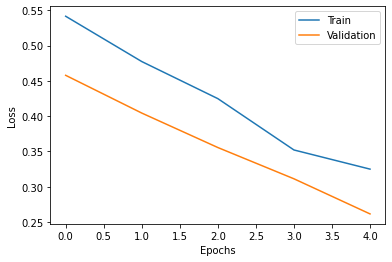

In [15]:
plt.plot(results.history["loss"],label="Train")
plt.plot(results.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

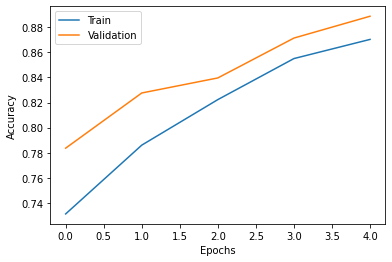

In [16]:
plt.plot(results.history["accuracy"],label="Train")
plt.plot(results.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
#performance evaluation
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 26ms/step - loss: 0.2718 - accuracy: 0.8876


[0.2718241512775421, 0.8876000046730042]

In [18]:
prediction_results = model.predict(X_test[789].reshape(1,1024))

In [19]:
print(f"Label: {y_test[789]}|Prediction:{prediction_results}")

Label: 0|Prediction:[[0.05861239]]
